In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import imageio
import skimage.transform
from dnn_app_utils_v3 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (4.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## Dataset

In [2]:
from PIL import Image
import numpy as np
import pandas as pd
import sys
import os
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

#Define where to look up the images -----------------------------------------------------
train_path = 'images/train/*.jpg'
addrs_train = glob.glob(train_path)

#Define features and labels for train ---------------------------------------------------

#Define function createFileList
def createFileList(myDir, format='.jpg'):
    fileList = []
    print("Scanning inside " + myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList


#Load the original image
myTrainList = createFileList('images/train/')

train_size = 95
test_size = 29
image_width = 300
image_height = 300

train_x_orig = []
#For each files in the folder, save the grayscale values
for i, file in enumerate(myTrainList):
    train_x_orig = np.append(train_x_orig, mpimg.imread(file))
    
#train_x_orig = train_x_orig.flatten()
train_x_orig = np.reshape(train_x_orig, (train_size, image_width, image_height, 3)).astype(int)
labels = [1 if 'parkirliar' in addr_train else 0 for addr_train in addrs_train]  # 0 = Normal, 1 = Catarac
train_labels = np.asarray(labels).astype(int)
train_y = np.array([train_labels][:]) # your train set labels
        
#Define where to look up the images -----------------------------------------------------
test_path = 'images/test/*.jpg'
addrs_test = glob.glob(test_path)
    
#Define features and labels for test ----------------------------------------------------

#Load the original image
myTestList = createFileList('images/test/')

test_x_orig = []
#For each files in the folder, save the grayscale values
for file in myTestList:
    test_x_orig = np.append(test_x_orig, mpimg.imread(file))
    
test_x_orig = np.reshape(test_x_orig, (test_size, image_width, image_height, 3)).astype(int)
labels = [1 if 'parkirliar' in addr_test else 0 for addr_test in addrs_test]  # 0 = Normal, 1 = ParkirLiar
test_labels = np.asarray(labels).astype(int)
test_y = np.array([test_labels][:]) # your train set labels
        
classes = np.array([b'Normal', b'Terdeteksi Parkir Liar'], dtype=np.dtype('|S'))

print ("Done!")

Scanning inside images/train/
Scanning inside images/test/
Done!


In [3]:
train_x_orig

array([[[[208, 230, 241],
         [206, 228, 239],
         [204, 226, 237],
         ...,
         [217, 226, 235],
         [215, 224, 231],
         [212, 221, 228]],

        [[211, 233, 244],
         [209, 231, 242],
         [208, 230, 243],
         ...,
         [215, 225, 234],
         [215, 224, 233],
         [214, 223, 230]],

        [[207, 229, 242],
         [206, 228, 241],
         [207, 226, 240],
         ...,
         [212, 225, 234],
         [214, 224, 234],
         [214, 224, 233]],

        ...,

        [[ 78,  86,  99],
         [ 78,  86,  99],
         [ 78,  85, 101],
         ...,
         [ 95,  99, 110],
         [ 94,  98, 109],
         [ 94,  98, 109]],

        [[ 84,  92, 105],
         [ 82,  90, 103],
         [ 80,  87, 103],
         ...,
         [ 94,  98, 109],
         [ 93,  97, 108],
         [ 92,  96, 107]],

        [[ 89,  97, 110],
         [ 85,  93, 106],
         [ 81,  88, 104],
         ...,
         [ 92,  96, 107],
        

In [4]:
test_x_orig

array([[[[114, 124,  87],
         [108, 119,  87],
         [111, 123, 101],
         ...,
         [ 63,  61,  49],
         [ 66,  62,  53],
         [ 69,  65,  56]],

        [[137, 148, 114],
         [119, 132, 104],
         [119, 132, 114],
         ...,
         [ 78,  76,  64],
         [ 75,  71,  60],
         [ 60,  56,  45]],

        [[128, 142, 116],
         [148, 163, 142],
         [157, 173, 160],
         ...,
         [ 81,  79,  66],
         [ 73,  69,  57],
         [ 55,  51,  40]],

        ...,

        [[131, 130, 126],
         [126, 125, 121],
         [124, 123, 119],
         ...,
         [147, 149, 146],
         [147, 149, 146],
         [147, 149, 146]],

        [[133, 132, 128],
         [128, 127, 123],
         [125, 124, 120],
         ...,
         [148, 150, 147],
         [148, 150, 147],
         [148, 150, 147]],

        [[138, 137, 133],
         [132, 131, 127],
         [128, 127, 123],
         ...,
         [151, 153, 150],
        

In [5]:
test_y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1]])

y = 0. It's a Normal picture.


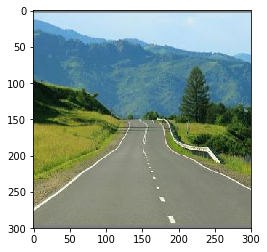

In [6]:
# Example of a picture
index = 8
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [7]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 95
Number of testing examples: 29
Each image is of size: (300, 300, 3)
train_x_orig shape: (95, 300, 300, 3)
train_y shape: (1, 95)
test_x_orig shape: (29, 300, 300, 3)
test_y shape: (1, 29)


In [8]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (270000, 95)
test_x's shape: (270000, 29)


## Architecture of the model

## Two-layer neural network

In [9]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 270000     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [10]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 40, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6940423606699225
Cost after iteration 100: 0.5025858467942589
Cost after iteration 200: 0.1563986128733714
Cost after iteration 300: 0.02698651927633172
Cost after iteration 400: 0.00998994118885338
Cost after iteration 500: 0.005622589775128317
Cost after iteration 600: 0.003784783941466939
Cost after iteration 700: 0.002803313233613808
Cost after iteration 800: 0.0022025590030136026
Cost after iteration 900: 0.0018012003031002272
Cost after iteration 1000: 0.0015160353084403045
Cost after iteration 1100: 0.001304024857184143
Cost after iteration 1200: 0.0011408384690623282
Cost after iteration 1300: 0.0010117074194566829
Cost after iteration 1400: 0.0009072131818714376


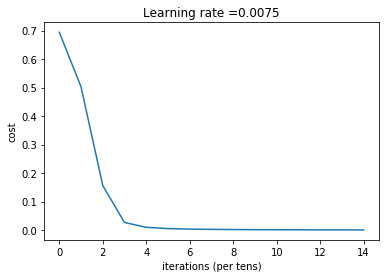

In [12]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 1500, print_cost=True)

In [13]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 1.0000000000000004


In [14]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.689655172413793


## Test with your own image ##

Accuracy: 0.0
y = 0.0, your L-layer model predicts a "Normal" picture.


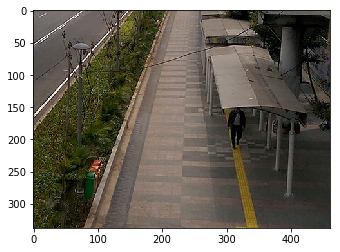

In [17]:

my_image = "21.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)

fname = "images/newcase/" + my_image
image = np.array(imageio.imread(fname))
#my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_image = skimage.transform.resize(image, (num_px,num_px), mode='constant').reshape((num_px*num_px*3,1))
#my_image = my_image/255
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")